In [1]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from transformers import CLIPTextModel, CLIPTokenizer
import torch
import cv2
from PIL import Image
import numpy as np

# 加载 ControlNet 和 Stable Diffusion
controlnet = ControlNetModel.from_pretrained("../autodl-tmp/models--lllyasviel--control_v11p_sd15_canny/snapshots/115a470d547982438f70198e353a921996e2e819")
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "../autodl-tmp/runwayml--stable-diffusion/snapshots/f03de327dd89b501a01da37fc5240cf4fdba85a1", controlnet=controlnet
)
pipe.to("cuda")  # 使用GPU加速
pipe.safety_checker = None  # 禁用安全检查器

/root/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.76it/s]


100%|██████████| 130/130 [02:16<00:00,  1.05s/it]


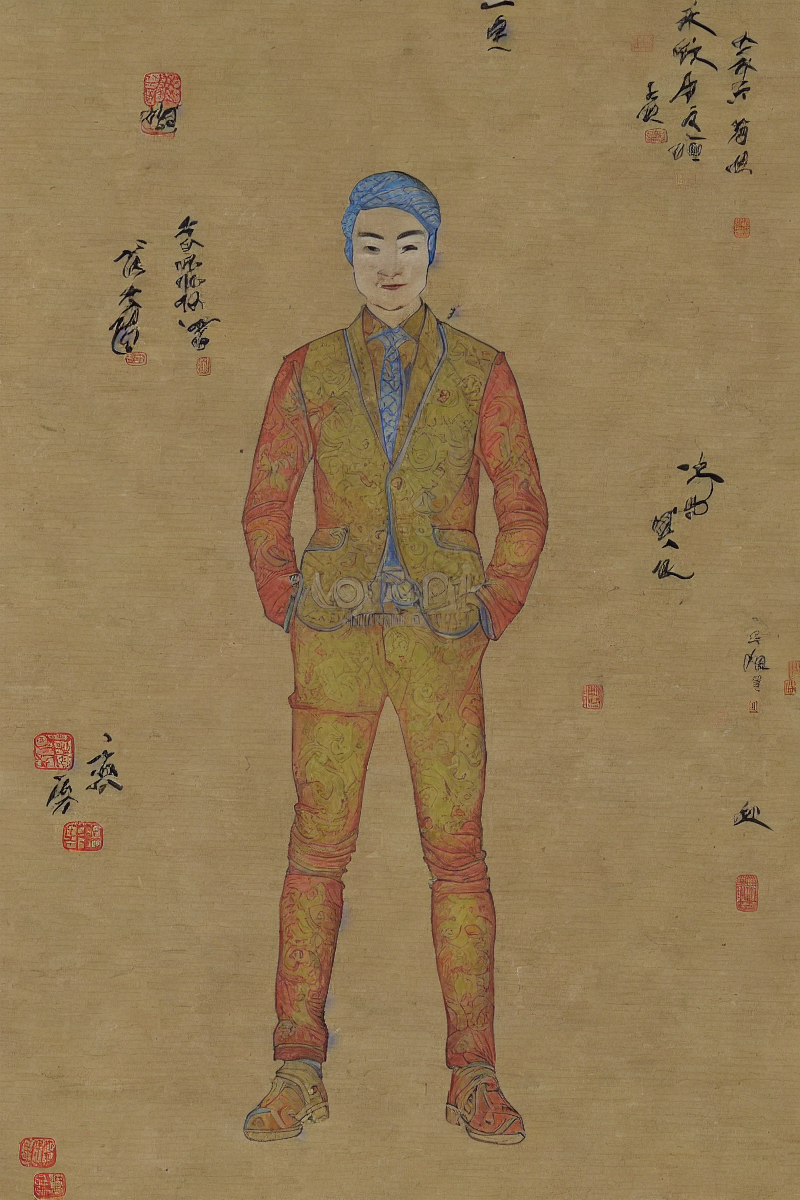

In [5]:
# 加载并预处理输入图像
input_image = cv2.imread("./human/human_6.jpg")
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)
edges_image = Image.fromarray(edges)

# 生成年画风格的图像
prompt = "a traditional Chinese New Year painting style of a warrior figure, vibrant colors, detailed lines"
generated_image = pipe(prompt, image=edges_image, num_inference_steps=130).images[0]

# 保存生成结果
generated_image.save("generated_images/ori_img/ori_6.jpg")
generated_image.show()